# Question 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mat73
import math
from numpy.linalg import eig
data_dict1 = np.array(mat73.loadmat('../data/points2D_Set1.mat'))
X1 = data_dict1.item(0)['x']
Y1 = data_dict1.item(0)['y']

data_dict2 = np.array(mat73.loadmat('../data/points2D_Set2.mat'))
X2 = data_dict2.item(0)['x']
Y2 = data_dict2.item(0)['y']


In [17]:

def plotlinRelation(X, Y):
    data = np.array([X, Y])
    mean = np.sum(data, axis = 1).reshape(2,1)/len(X)
    meanCov = data@((data - mean).T)/(data-mean).shape[1]
    
    eigenvalues, eigenvectors = eig(meanCov)
    dir = eigenvectors[:, np.argmax(eigenvalues)]
    X1_line = [mean[0] - dir[0]*math.sqrt(eigenvalues[np.argmax(eigenvalues)]), mean[0], mean[0] + dir[0]*math.sqrt(eigenvalues[np.argmax(eigenvalues)])]
    X2_line = [mean[1] - dir[1]*math.sqrt(eigenvalues[np.argmax(eigenvalues)]), mean[1], mean[1] + dir[1]*math.sqrt(eigenvalues[np.argmax(eigenvalues)])]

    plt.scatter(data[0, :], data[1, :], color="red")
    plt.plot(X1_line, X2_line, color="blue", lw=3)

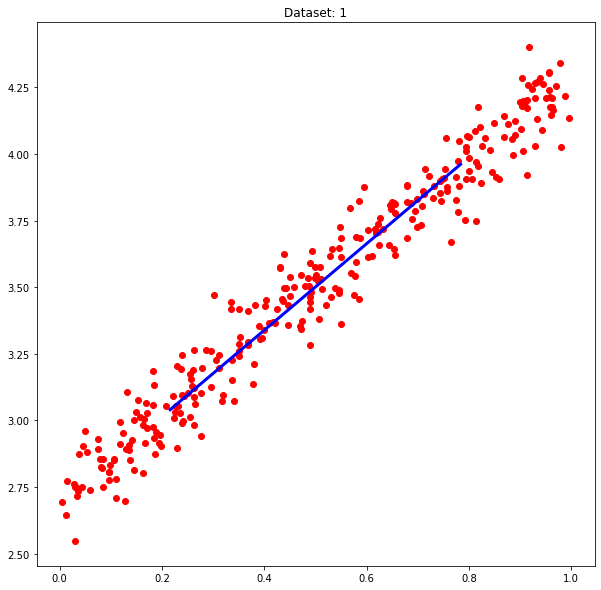

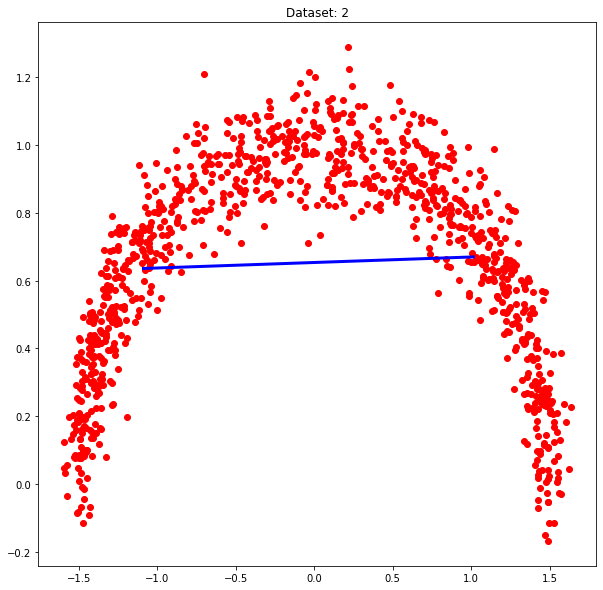

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plotlinRelation(X1, Y1)
plt.title("Dataset: 1")
plt.show()
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plotlinRelation(X2, Y2)
plt.title("Dataset: 2")
plt.show()